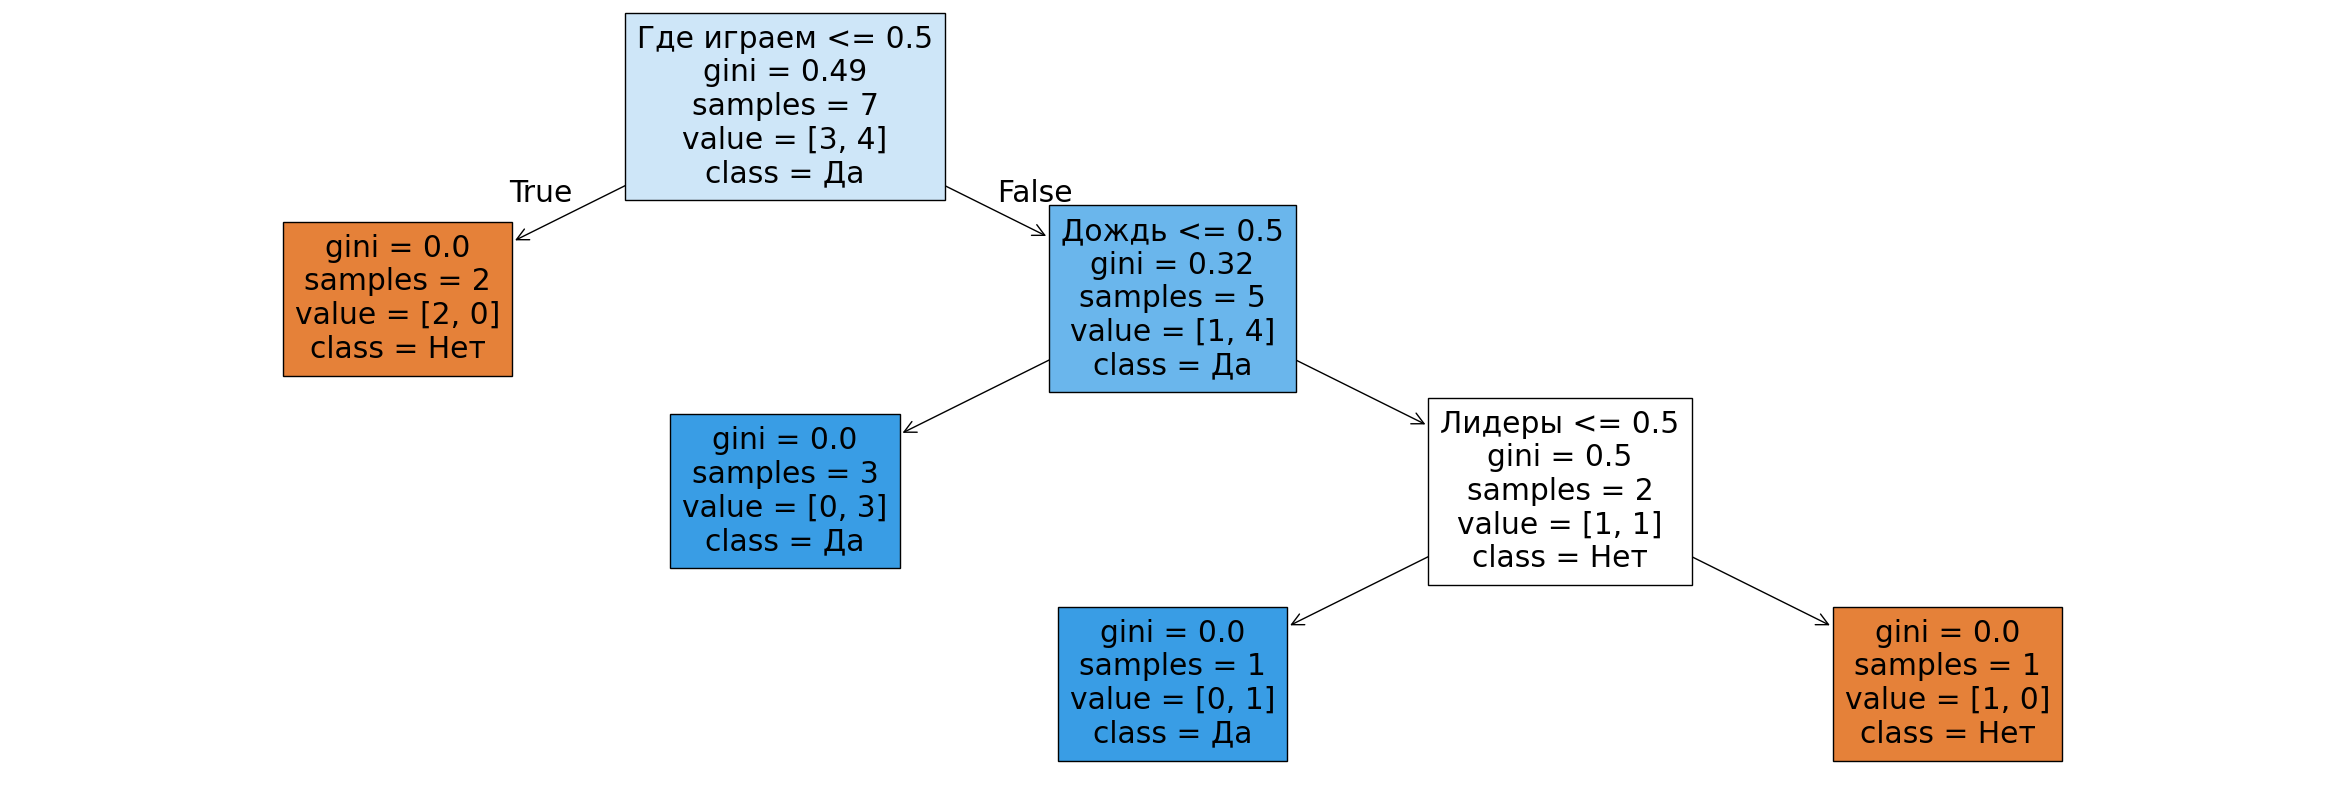

Высота дерева решений: 3
Предсказанный результат: Нет


In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

data = pd.read_excel('/train_set_2.xlsx')

data_encoded = data.copy()
data_encoded['Соперник'] = data_encoded['Соперник'].map({'Выше': 1, 'Ниже': 0})
data_encoded['Где играем'] = data_encoded['Где играем'].map({'Дома': 1, 'В гостях': 0})
data_encoded['Лидеры'] = data_encoded['Лидеры'].map({'На месте': 1, 'Пропускают': 0})
data_encoded['Дождь'] = data_encoded['Дождь'].map({'Да': 1, 'Нет': 0})
data_encoded['Победа'] = data_encoded['Победа'].map({'Да': 1, 'Нет': 0})

X = data_encoded[['Соперник', 'Где играем', 'Лидеры', 'Дождь']]
y = data_encoded['Победа']

X_test = X[y.isna()]
X = X[~y.isna()]
y = y.dropna()

# Обучение дерева решений
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Визуализация дерева решений
plt.figure(figsize=(30, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Нет", "Да"], filled=True)
plt.show()

# Высота дерева решений
tree_height = clf.get_depth()
print(f"Высота дерева решений: {tree_height}")


prediction = clf.predict(X_test)
predicted_result = "Да" if prediction[0] == 1 else "Нет"
print(f"Предсказанный результат: {predicted_result}")